In [1]:
import pandas as pd

# steps
# 1. find out how accurate forecast is -> metric to see how acurate it is from data overlap
# 2. connect weather in counties to weather stations /latitude+longitude -> calculate data for county centers (interpolation)
# 3. add installed capacity, electricity & gas prices to train
#    map customer (installed capacity) to train dataframe
# 4. train model, ideally predict per customer -> train also per customer

# model architecture:
# - step 1: check how accurate forecast is
# - step 2: interpolate weather for county centers

# - for each customer (we might miss a general trend tho!!):
#   - 24h of interpolated weather for county of customer
#   - 24h of electricity prices
#   - inputs general:
#           accuracy score of weather, 
#           gas_prices
#           time features (hour, day of year, weekday, month, holiday) / holiday & weekend as one class
#   - client based inputs
#           installed capacity, 
#           is_business, 
#           product_type,
#           eic_count (might be not needed)

# Predict per DAY, not per hour!! all the inputs to the model at the same time & make predictions for each time 
# OR
# predict per hour and feed data forward
# OR
# predict for all customers at once (we might get a general trend)
# OR
# split info into general inputs per county & client specific info (multiple stages of NN) -> multiple inputs to transformer net

# predict consumption & production in one net
# OR
# predict them in separate networks

# architectures:
# transformers with different input format, time based input + const input
# 2 different heads for production / consumption (careful with row_id)


# things to try:
# - add sunlight duration to day
# - interpolate gas & electricity prices to today
# - model distance from station as individual customer forecast probability -> correlation of usage and weather
# 

# problems:
# - find out when customer id changes -> absolut number of customers can help
# - how to use weather predictions

#Metric 
# mean absolute error

In [4]:
client = pd.read_csv("../data/client.csv")
# all clients of company: product type, county, isbusiness, datablockid (same time for forecast) SAME as train
# per date 
# new info: eic_count (unique business id) + installed capacity
# data is availalbe only from 2 days ago -> problem: if the eic id / customer changes I won't know for 2 days
# change of customer always happens daily! (at midnight)
# change of customer might be correlated to the overall number of customers over time!

ePrices = pd.read_csv("../data/electricity_prices.csv")
# forecasted prices for a specific date
# has origin date + data_block_id
# forecast per hour

gasPrices = pd.read_csv("../data/gas_prices.csv")
# forecast per date
# lowest & highest price -> difference
# data block id

# GAS & E prices
# we have prediction for yesterday -> interpolation to today

weatherPred = pd.read_csv("../data/forecast_weather.csv")
# longitude & latitude -> connect to county!!
# hours ahead
# MAYBE central time zone 2 h difference , forecasts 48 hours, only 24 are important!
# temp, dewpoint, cloudcover high + low + total + mid (total=high+low), 10m east(u) wind, 10m north(v) wind, direct solar radiation, surface solar (direct + diffuse), snowfall, total precipitation
# data block, 
# origin date in DATE valid for 48 hours!!!
# forecast date in hours -> hours ahead + origin date
# has 24h overlap with train 24-47
# latitude & longitude grid -> try to find nearest weather station / distance from center as feature

weatherHist = pd.read_csv("../data/historical_weather.csv")
# datetime per HOUR
#  MAYBE estonian time zone (utc+2), available per day
# latitude longitude
# temp, dewpoint, rain, snowfall, surface pressure, cloudcover low, mid, high, total, shortwave + diffuse radiation, direct solar,
# data block it
# has 10 hours overlap with predictions -> score of weather forecast
# not all predicted weather stations also have history!

train = pd.read_csv("../data/train.csv")
# data per hour (estonian time utc + 2/3)
# county, isbusiness, product type, data block id
# row_id == index -> unimportant
# prediction unit = unique identifier for county, business, product type  == client id (new ones can appear) -> get eic count + capacity over similar indicators
# target
# is consumption (0,1)!! -> indicates if target is consumed or produced -> different prediction

# all prediction_units are constant for businesses & county & product type, either all businesses or all no businesses
# target for sure correlated to month / year day since daylight is crucial
# also correlated to hour -> estimated daylight per lat/long -> suntimes module!



#general:
# it seems that we only have the data from one data_block_id and no old data for making predictions
# -> build time features (day, hour, month, yearday, holidays,..)


<AxesSubplot:>

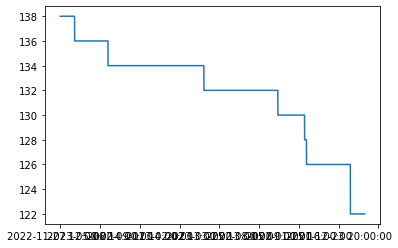

In [53]:
# number of customers
train.datetime.value_counts().plot()
